# Question 3.1

In [52]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

import matplotlib.pyplot as plt


In [56]:
array = np.loadtxt("/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3732/6373Pset3/data/CO2Data_modified.csv", delimiter=',')
# # df['t'] = (df["Mn"] - 0.5) / 12 + df["Yr"] - 1958

# # df['Mn']
# print(df.head())
t_col = ((array[:, 1]-0.5)/12 + array[:, 0] - 1958).reshape(-1,1)

array = np.hstack((t_col, array))
array = array[:, [0, 1, 2, 5]]

filtered_array = array[array[:, -1] != -99.99]

print(filtered_array)

[[2.08333333e-01 1.95800000e+03 3.00000000e+00 3.15690000e+02]
 [2.91666667e-01 1.95800000e+03 4.00000000e+00 3.17450000e+02]
 [3.75000000e-01 1.95800000e+03 5.00000000e+00 3.17500000e+02]
 ...
 [5.85416667e+01 2.01600000e+03 7.00000000e+00 4.04500000e+02]
 [5.86250000e+01 2.01600000e+03 8.00000000e+00 4.02240000e+02]
 [5.87083333e+01 2.01600000e+03 9.00000000e+00 4.01010000e+02]]


### Part(a)

In [57]:
model = LinearRegression()

x = (filtered_array[:, 0]).reshape(-1,1)

y = (filtered_array[:, 3]).reshape(-1,1)

model.fit(x, y)

print(model.coef_)
print(model.intercept_)

y_pred = model.predict(x)

residuals = y-y_pred


[[1.5239544]]
[306.83060094]


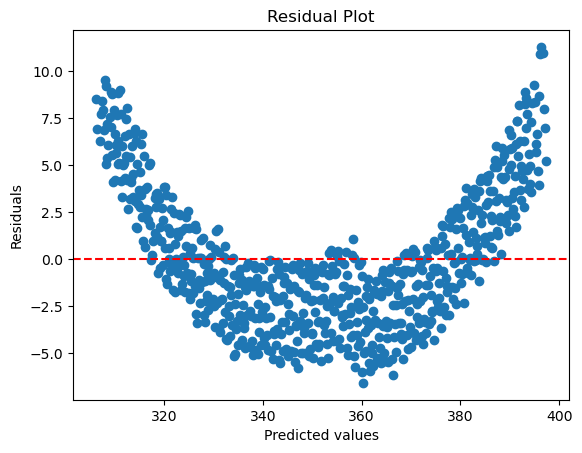

In [ ]:
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at 0
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Linear Residual Plot")
plt.savefig("Linear Residual Plot")
plt.show()

### Part(b)

In [94]:
t2 = (filtered_array[:, 0])**2

deg2_array = np.insert(filtered_array, 1, t2, axis=1)


In [106]:
model = LinearRegression()

x = deg2_array[:, [0,1]]

y = (deg2_array[:, -1]).reshape(-1,1)

model.fit(x, y)

print(model.coef_)
print(model.intercept_)

y_pred = model.predict(x)

residuals = y-y_pred

[[0.78335788 0.012517  ]]
[314.23913072]


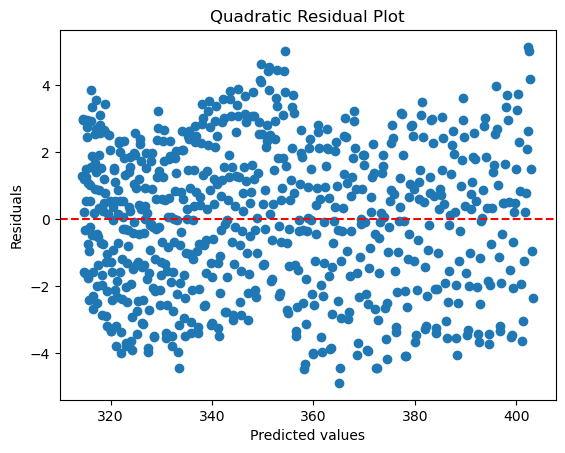

In [96]:
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at 0
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Quadratic Residual Plot")
plt.savefig("Quadratic Residual Plot")
plt.show()

### Part (c)

In [ ]:
t3 = (filtered_array[:, 0])**3
t4 = (filtered_array[:, 0])**4

deg4_array = np.insert(deg2_array, 2, t3, axis=1)
deg4_array = np.insert(deg4_array, 3, t4, axis=1)

print(deg4_array[0])

[2.08333333e-01 4.34027778e-02 9.04224537e-03 1.88380112e-03
 1.95800000e+03 3.00000000e+00 3.15690000e+02]


In [ ]:
model = LinearRegression()

x = deg4_array[:, [0,1,2,3]]

y = (deg4_array[:, -1]).reshape(-1,1)

model.fit(x, y)

print(model.coef_)
print(model.intercept_)

y_pred = model.predict(x)

residuals = y-y_pred

[[ 2.94588200e-01  4.89377287e-02 -9.48450734e-04  7.98068371e-06]]
[315.76663046]
[[-0.14011848]
 [ 1.59330835]
 [ 1.61606695]
 [-0.08040749]
 [-1.03963405]
 [-2.78951586]
 [-2.73123237]
 [-1.42306066]
 [-0.50553138]
 [ 0.22135865]
 [ 0.51761261]
 [ 1.49323365]
 [ 2.02822495]
 [ 1.85258963]
 [ 0.20633083]
 [-1.57054831]
 [-2.56804468]
 [-3.18615517]
 [-1.68487668]
 [-0.94420613]
 [-0.13414042]
 [ 0.3653235 ]
 [ 0.93418871]
 [ 2.33245825]
 [ 3.30013518]
 [ 2.81722251]
 [ 1.36372329]
 [-0.96035948]
 [-2.73502278]
 [-3.12026363]
 [-1.99607902]
 [-0.85246599]
 [-0.15942156]
 [ 0.56305723]
 [ 1.35497333]
 [ 2.24632968]
 [ 3.29712922]
 [ 2.43737486]
 [ 1.18706953]
 [-0.64378387]
 [-2.67518245]
 [-2.15712331]
 [-1.48960359]
 [-0.63262041]
 [ 0.24382909]
 [ 0.79974775]
 [ 1.87513843]
 [ 2.77000394]
 [ 3.09434711]
 [ 2.57817075]
 [ 1.54147767]
 [-0.68572933]
 [-1.89344748]
 [-2.781674  ]
 [-1.57040612]
 [-0.61964108]
 [ 0.36062387]
 [ 0.63039146]
 [ 1.35966442]
 [ 2.82844548]
 [ 3.62673735]
 [

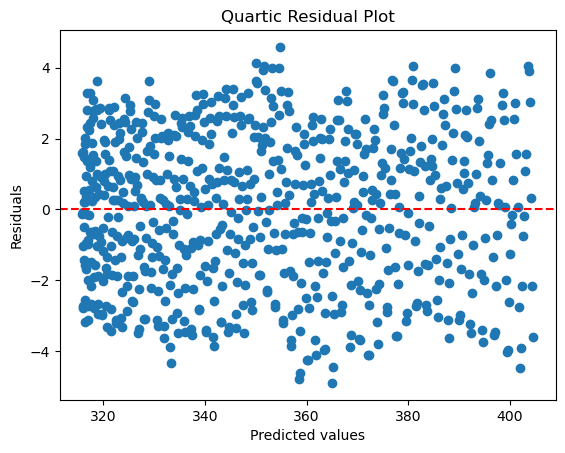

In [103]:
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at 0
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Quartic Residual Plot")
plt.savefig("Quartic Residual Plot")
plt.show()